<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plot-2.0" data-toc-modified-id="Plot-2.0-1">Plot 2.0</a></span></li><li><span><a href="#Plot-2a" data-toc-modified-id="Plot-2a-2">Plot 2a</a></span></li><li><span><a href="#Figure-3a" data-toc-modified-id="Figure-3a-3">Figure 3a</a></span></li><li><span><a href="#Figure-3b" data-toc-modified-id="Figure-3b-4">Figure 3b</a></span></li><li><span><a href="#Figure-3c" data-toc-modified-id="Figure-3c-5">Figure 3c</a></span></li></ul></div>

In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl, seaborn as sns
import plot_utils as pu
from glob import glob
%matplotlib inline

In [2]:
sns.set_context('poster')

In [267]:
results = {}
for infile in glob('../results/*'):
    run_name = infile.split('/')[-1]
    if (run_name.count('_') == 4) or ('serial' in run_name):
        try:
            results[run_name] = pu.RunResults(run_name)
            print(run_name)
        except FileNotFoundError:
            print('-- {:s}'.format(run_name))
        except BaseException as e:
            print('-------{:s}'.format(run_name))
            print(e)
runs = list(results.keys())

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


gpuc_576-12_100000_3_100
mpi_32_1000_1000_10
gpuc_16-8_1000_10_100
gpuc_16-8_16000_3_100
gpu_64-2_1000_100_100
gpu_8-4_100000_3_100
gpu_384-8_10000_10_100
gpu_8-4_1000_100_100
gpuc_1_4000_3_100
gpu_4-2_10000_10_100
mpi_16_1000_1000_10
serial_4000_3_100
gpu_24-12_1000_100_100
serial_16000_3_100
gpu_24-12_100000_3_100
gpuc_8-2_1000_10_100
gpu_8_1000_100_100
gpuc_576-12_64000_3_100
gpu_16-8_100000_3_100
gpu_16-8_1000_100_100
gpu_1_4000_30_100
gpu_24-12_10000_10_100
serial_1000_1000_10
gpuc_8-4_100000_3_100
serial_1000_1000_100
gpuc_8-8_1000_10_100
gpu_8-8_1000_100_100
gpu_2_1000_100_100
gpu_16-8_10000_10_100
gpuc_2-2_1000_10_100
gpu_4-4_1000_100_100
gpu_2-2_1000_100_100
gpuc_16-8_100000_3_100
gpuc_8-1_1000_10_100
gpuc_128-8_1000_10_100
gpu_96-2_1000_100_100
gpu_8-4_10000_10_100
gpu_384-8_1000_100_100
gpuc_8-4_1000_10_100
gpuc_8-4_16000_3_100
gpuc_4-2_4000_10_100
gpu_4_1000_100_100
serial_4000_1000_10
gpu_4-2_1000_100_100
mpi_8_16000_1000_10
serial_16000_100_100
serial_16000_1000_10
gpuc_3

In [275]:
results['gpuc_4-2_1000_10_100'].med_times['Integ.'] = 0.003

In [192]:
serial_runs = [r for r in runs if 'serial' in r]
mpi_runs = [r for r in runs if 'mpi' in r]
gpu_runs = [r for r in runs if 'gpu_' in r]
gpuc_runs = [r for r in runs if 'gpuc' in r]
others = [r for r in runs if (r not in serial_runs) and (r not in mpi_runs) and (r not in gpu_runs) and (r not in gpuc_runs)]

In [193]:
serial_runs

['serial_4000_3_100',
 'serial_16000_3_100',
 'serial_1000_1000_10',
 'serial_1000_1000_100',
 'serial_4000_1000_10',
 'serial_16000_100_100',
 'serial_16000_1000_10',
 'serial_1000_3_100']

In [194]:
mpi_runs

['mpi_32_1000_1000_10',
 'mpi_16_1000_1000_10',
 'mpi_8_16000_1000_10',
 'mpi_8_1000_1000_10',
 'mpi_32_100000_10000_100',
 'mpi_32_10000_10000_100',
 'mpi_64_1000_1000_10',
 'mpi_4_1000_1000_10',
 'mpi_2_1000_1000_10']

In [195]:
gpu_runs

['gpu_64-2_1000_100_100',
 'gpu_8-4_100000_3_100',
 'gpu_384-8_10000_10_100',
 'gpu_8-4_1000_100_100',
 'gpu_4-2_10000_10_100',
 'gpu_24-12_1000_100_100',
 'gpu_24-12_100000_3_100',
 'gpu_8_1000_100_100',
 'gpu_16-8_100000_3_100',
 'gpu_16-8_1000_100_100',
 'gpu_1_4000_30_100',
 'gpu_24-12_10000_10_100',
 'gpu_8-8_1000_100_100',
 'gpu_2_1000_100_100',
 'gpu_16-8_10000_10_100',
 'gpu_4-4_1000_100_100',
 'gpu_2-2_1000_100_100',
 'gpu_96-2_1000_100_100',
 'gpu_8-4_10000_10_100',
 'gpu_384-8_1000_100_100',
 'gpu_4_1000_100_100',
 'gpu_4-2_1000_100_100',
 'gpu_48_1000_100_100',
 'gpu_1_1000_100_100',
 'gpu_12-12_1000_100_100',
 'gpu_576-12_10000_10_100',
 'gpu_16_1000_100_100',
 'gpu_576-12_1000_100_100',
 'gpu_32_1000_100_100',
 'gpu_1_16000_10_100']

In [196]:
gpuc_runs

['gpuc_576-12_100000_3_100',
 'gpuc_16-8_1000_10_100',
 'gpuc_16-8_16000_3_100',
 'gpuc_1_4000_3_100',
 'gpuc_8-2_1000_10_100',
 'gpuc_576-12_64000_3_100',
 'gpuc_8-4_100000_3_100',
 'gpuc_8-8_1000_10_100',
 'gpuc_2-2_1000_10_100',
 'gpuc_16-8_100000_3_100',
 'gpuc_8-1_1000_10_100',
 'gpuc_128-8_1000_10_100',
 'gpuc_8-4_1000_10_100',
 'gpuc_8-4_16000_3_100',
 'gpuc_4-2_4000_10_100',
 'gpuc_32-8_1000_10_100',
 'gpuc_576-12_4000_3_100',
 'gpuc_8-4_4000_10_100',
 'gpuc_4-2_16000_3_100',
 'gpuc_4-2_1000_10_100',
 'gpuc_256-8_1000_10_100',
 'gpuc_576-12_10000_3_100',
 'gpuc_2_1000_10_100',
 'gpuc_576-12_32000_3_100',
 'gpuc_4-4_1000_10_100',
 'gpuc_64-8_1000_10_100',
 'gpuc_4_1000_10_100',
 'gpuc_1_16000_3_100',
 'gpuc_1_1000_10_100',
 'gpuc_16-8_4000_10_100',
 'gpuc_576-12_1000_10_100',
 'gpuc_576-12_16000_3_100']

# Plot 2.0

298.15384615384613 297.431061 42.315743


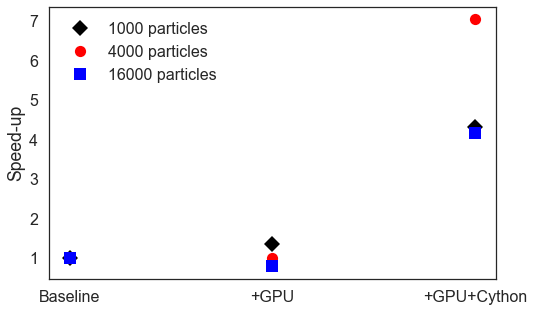

In [209]:
fig, axis = plt.subplots(figsize=(8,5))
axis.set_xlabel('')
axis.set_xticks([0,1,2])
axis.set_xticklabels(['Baseline', '+GPU', '+GPU+Cython'])
axis.set_ylabel('Speed-up')
# 1000
base_time = 38.
gpu_time = results['gpu_1_1000_100_100'].med_times['Overall']
gpuc_time = results['gpuc_1_1000_10_100'].med_times['Overall']
axis.plot(0, 1.0, 'kD')
axis.plot(1, base_time/gpu_time, 'kD')
axis.plot(2, base_time/gpuc_time, 'kD', label='1000 particles')
# 4000
base_time = 38. *(102 / 13)
gpu_time = results['gpu_1_4000_30_100'].med_times['Overall']
gpuc_time = results['gpuc_1_4000_3_100'].med_times['Overall']
print(base_time, gpu_time, gpuc_time)
axis.plot(0, 1.0, 'ro')
axis.plot(1, base_time/gpu_time, 'ro')
axis.plot(2, base_time/gpuc_time, 'ro', label='4000 particles')
# 16000
base_time = 38. * (334 / 13) 
gpu_time = results['gpu_1_16000_10_100'].med_times['Overall']
gpuc_time = results['gpuc_1_16000_3_100'].med_times['Overall']
axis.plot(0, 1.0, 'bs')
axis.plot(1, base_time/gpu_time, 'bs')
axis.plot(2, base_time/gpuc_time, 'bs', label='16000 particles')
axis.legend(loc=0)
plt.savefig('optimizations.jpg')

# Plot 2a

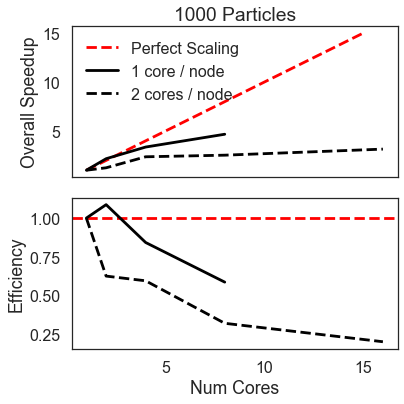

In [269]:
fig, axes = plt.subplots(figsize=(6,6), nrows=2, sharex=True)
axes[1].set_xlabel('Num Cores')
axes[0].set_ylabel('Overall Speedup'), axes[1].set_ylabel('Efficiency')
axes[0].set_title('1000 Particles')
base_time = results['gpuc_1_1000_10_100'].med_times['Overall']
speedup_one = [base_time / results['gpuc_1_1000_10_100'].med_times['Overall']]
nc_one = [1]
for n in range(128):
    try:
        t = results['gpuc_{:d}-{:d}_1000_10_100'.format(n,n)].med_times['Overall']
        speedup_one.append(base_time / t)
        nc_one.append(n)
    except:
        pass
speedup_two = [base_time / results['gpuc_1_1000_10_100'].med_times['Overall']]
speedup_two.append(base_time / results['gpuc_2_1000_10_100'].med_times['Overall'])
nc_two = [1, 2]
for n in range(128):
    try:
        t = results['gpuc_{:d}-{:d}_1000_10_100'.format(n*2,n)].med_times['Overall']
        speedup_two.append(base_time / t)
        nc_two.append(n*2)
    except:
        pass

axes[0].plot(np.arange(1, max(nc_two)), np.arange(1, max(nc_two)), 'r--', label='Perfect Scaling')
axes[0].plot(nc_one, speedup_one, 'k-', label='1 core / node')
axes[0].plot(nc_two, speedup_two, 'k--', label='2 cores / node')
axes[1].axhline(y=1, ls='--', color='r')
axes[1].plot(nc_one, np.array(speedup_one) / np.array(nc_one), 'k-')
axes[1].plot(nc_two, np.array(speedup_two) / np.array(nc_two), 'k--')
axes[0].legend(loc=0)
plt.tight_layout()
plt.savefig('speedup.jpg')

# Figure 3a

In [225]:
def make_pie(run_name):
    ts = results[run_name].med_times
    fig, axis = plt.subplots()
    labels = ['Tree', 'Force', 'Comm.', 'Integ.',]
    explode = [0.25, 0., 0., 0.9]
    sizes = [ts['Tree'], ts['Force'], ts['Comm.'],  ts['Integ.']]
    axis.pie(sizes, labels=labels, explode=explode, autopct='%1.3f%%',
            shadow=False, startangle=90)
    axis.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    return axis

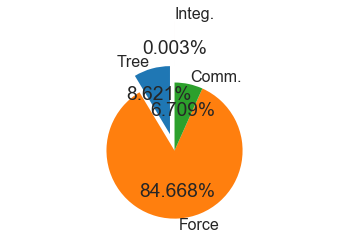

In [229]:
ax = make_pie('gpuc_1_1000_10_100')
plt.savefig('timing_pie_serial.jpg')

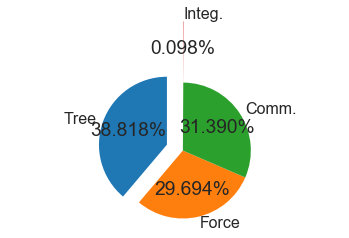

In [230]:
make_pie('gpuc_16-8_1000_10_100')
plt.savefig('timing_pie_16-8.jpg')

# Figure 3b

In [271]:
results['gpuc_1_1000_10_100'].med_times['Integ.'] = 0.0017
results['gpuc_1_1000_10_100'].med_times['Comm.'] = 0.4

In [272]:
results['gpuc_4-2_1000_10_100'].med_times

{'Broadcast': 0.6512715,
 'Comm.': 0.652857,
 'Force': 2.273703,
 'Gather': 0.0001935,
 'Integ.': 0.000224,
 'Overall': 3.7141015,
 'Scatter': 0.0015300000000000001,
 'Tree': 0.8141195}

In [273]:
results['gpuc_4-4_1000_10_100'].med_times

{'Broadcast': 0.45668,
 'Comm.': 0.45858,
 'Force': 1.544013,
 'Gather': 0.0002375,
 'Integ.': 0.0018915,
 'Overall': 2.616599,
 'Scatter': 0.0016515,
 'Tree': 0.6090765}

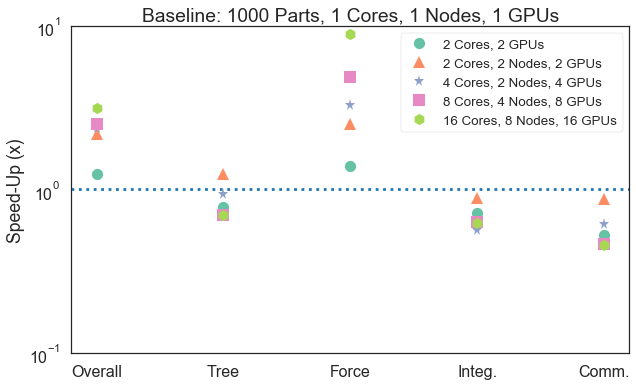

In [276]:
r = results['gpuc_1_1000_10_100']
ax = r.plot_speedups(results['gpuc_2_1000_10_100'])
ax = r.plot_speedups(results['gpuc_2-2_1000_10_100'], ax=ax)
ax = r.plot_speedups(results['gpuc_4-2_1000_10_100'], ax=ax)
ax = r.plot_speedups(results['gpuc_8-4_1000_10_100'], ax=ax)
ax = r.plot_speedups(results['gpuc_16-8_1000_10_100'], ax=ax)
ax.set_xlabel('')
ax.set_yscale('log')
ax.set_ylim([0.1, 10])
plt.savefig('scaling_times.jpg')

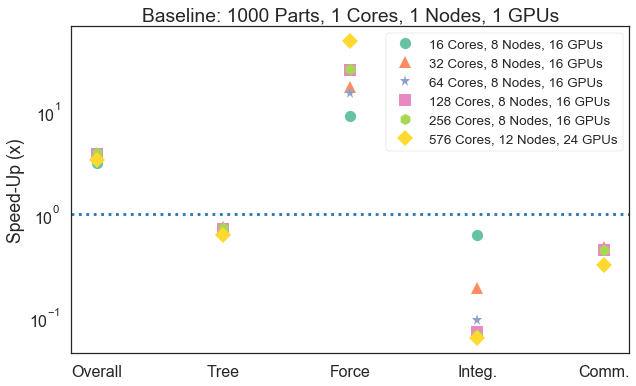

In [278]:
r = results['gpuc_1_1000_10_100']
ax = r.plot_speedups(results['gpuc_16-8_1000_10_100'])
ax = r.plot_speedups(results['gpuc_32-8_1000_10_100'], ax=ax)
ax = r.plot_speedups(results['gpuc_64-8_1000_10_100'], ax=ax)
ax = r.plot_speedups(results['gpuc_128-8_1000_10_100'], ax=ax)
ax = r.plot_speedups(results['gpuc_256-8_1000_10_100'], ax=ax)
ax = r.plot_speedups(results['gpuc_576-12_1000_10_100'], ax=ax)
ax.set_xlabel('')
ax.set_yscale('log')
# ax.set_ylim([0.1, 10])
# plt.savefig('scaling_times_large.jpg')

# Figure 3c

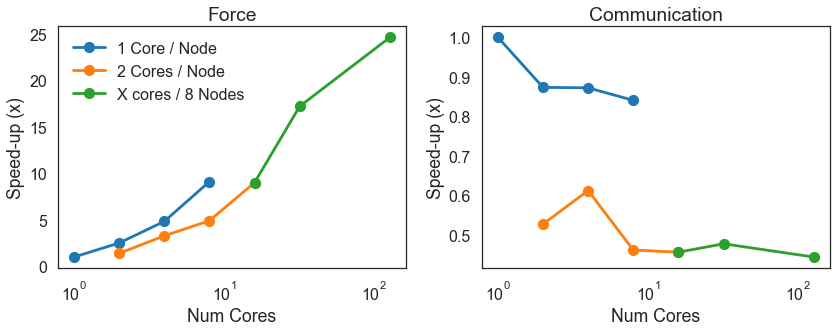

In [277]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharex=True)
# Tree
nc = np.array([1, 2, 4, 8])
base = results['gpuc_1_1000_10_100'].med_times
ts = {'Force':[1.], 'Comm.':[1.]}
for n in nc[1:]:
    for k in ts.keys():
        ts[k].append(base[k] / results['gpuc_{:d}-{:d}_1000_10_100'.format(n,n)].med_times[k])
axes[0].plot(nc, ts['Force'],'o-', label='1 Core / Node')
axes[1].plot(nc, ts['Comm.'],'o-',)
base = results['gpuc_1_1000_10_100'].med_times
ts = {'Force':[], 'Comm.':[]}
for n in nc[:1]:
    for k in ts.keys():
        ts[k].append(base[k] / results['gpuc_{:d}_1000_10_100'.format(2)].med_times[k])
for n in nc[1:]:
    for k in ts.keys():
        ts[k].append(base[k] / results['gpuc_{:d}-{:d}_1000_10_100'.format(2*n,n)].med_times[k])
axes[0].plot(nc*2, ts['Force'], 'o-', label='2 Cores / Node')
axes[1].plot(nc*2, ts['Comm.'], 'o-')
# unlimited
base = results['gpuc_1_1000_10_100'].med_times
nc = []
ts = {'Force':[], 'Comm.':[]}
for name in ['gpuc_16-8_1000_10_100','gpuc_32-8_1000_10_100', 'gpuc_128-8_1000_10_100',]:
    r = results[name]
    nc.append(r.Ncores)
    for k in ts.keys():
        ts[k].append(base[k] / r.med_times[k])
axes[0].plot(nc, ts['Force'], label='X cores / 8 Nodes', marker='o', ls='-')
axes[1].plot(nc, ts['Comm.'], marker='o', ls='-')
axes[0].set_title('Force')
axes[1].set_title('Communication')
axes[0].set_xticks([1, 2, 4, 8, 16])
axes[0].set_xlabel('Num Cores')
axes[1].set_xlabel('Num Cores')
axes[0].legend(loc=0)
for a in axes.flatten():
    a.set_xscale('log')
    a.set_ylabel('Speed-up (x)')
plt.tight_layout()
plt.savefig('speedup_force_comm.jpg')

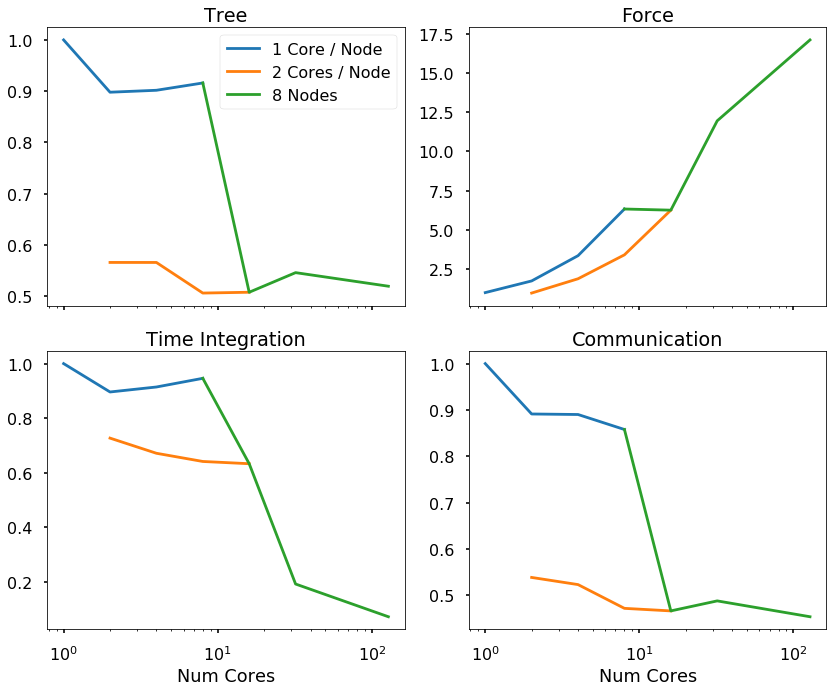

In [148]:
# fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 10), sharex=True)
# # Tree
# nc = np.array([1, 2, 4, 8])
# base = results['gpuc_1_1000_10_100'].med_times
# ts = {'Tree':[1.], 'Force':[1.], 'Integ.':[1.], 'Comm.':[1.]}
# for n in nc[1:]:
#     for k in ts.keys():
#         ts[k].append(base[k] / results['gpuc_{:d}-{:d}_1000_10_100'.format(n,n)].med_times[k])
# axes[0,0].plot(nc, ts['Tree'], label='1 Core / Node')
# axes[0,1].plot(nc, ts['Force'])
# axes[1,0].plot(nc, ts['Integ.'])
# axes[1,1].plot(nc, ts['Comm.'])
# base = results['gpuc_1_1000_10_100'].med_times
# ts = {'Tree':[], 'Force':[], 'Integ.':[], 'Comm.':[]}
# for n in nc[:1]:
#     for k in ts.keys():
#         ts[k].append(base[k] / results['gpuc_{:d}_1000_10_100'.format(2*n)].med_times[k])
# for n in nc[1:]:
#     for k in ts.keys():
#         ts[k].append(base[k] / results['gpuc_{:d}-{:d}_1000_10_100'.format(2*n,n)].med_times[k])
# axes[0,0].plot(nc*2, ts['Tree'], label='2 Cores / Node')
# axes[0,1].plot(nc*2, ts['Force'])
# axes[1,0].plot(nc*2, ts['Integ.'])
# axes[1,1].plot(nc*2, ts['Comm.'])
# # unlimited
# base = results['gpuc_1_1000_10_100'].med_times
# nc = []
# ts = {'Tree':[], 'Force':[], 'Integ.':[], 'Comm.':[]}
# # results['gpuc_']
# for name in ['gpuc_8-8_1000_10_100', 'gpuc_16-8_1000_10_100','gpuc_32-8_1000_10_100', 'gpuc_128-8_1000_10_100',]:
#     r = results[name]
#     nc.append(r.Ncores)
#     for k in ts.keys():
#         ts[k].append(base[k] / r.med_times[k])
# axes[0,0].plot(nc, ts['Tree'], label='8 Nodes')
# axes[0,1].plot(nc, ts['Force'])
# axes[1,0].plot(nc, ts['Integ.'])
# axes[1,1].plot(nc, ts['Comm.'])
# axes[0,0].set_title('Tree')
# axes[0,1].set_title('Force')
# axes[1,0].set_title('Time Integration')
# axes[1,1].set_title('Communication')
# axes[0,0].set_xticks([1, 2, 4, 8, 16])
# axes[1,0].set_xlabel('Num Cores')
# axes[1,1].set_xlabel('Num Cores')
# axes[0,0].legend(loc=0)
# for a in axes.flatten():
#     a.set_xscale('log')
# plt.tight_layout()

In [288]:
results['gpuc_4-2_16000_3_100'].med_times

{'Broadcast': 14.065438,
 'Comm.': 14.081706,
 'Force': 105.276457,
 'Gather': 0.00055,
 'Integ.': 0.00312,
 'Overall': 154.119939,
 'Scatter': 0.013216,
 'Tree': 33.673281}

In [290]:
results['gpuc_4-2_1000_10_100'].med_times

{'Broadcast': 0.6512715,
 'Comm.': 0.652857,
 'Force': 2.273703,
 'Gather': 0.0001935,
 'Integ.': 0.003,
 'Overall': 3.7141015,
 'Scatter': 0.0015300000000000001,
 'Tree': 0.8141195}